<a href="https://colab.research.google.com/github/davip99/Proyecto-Luca/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO LUCA - GRUPO 04

## Indice
1. [Sumario](#Sumario)
2. [Resumen](#Resumen)
3. [Informes](#Informes)
   1. [Listado de juegos](#Listado_de_juegos)
      1. [Todos los juegos](#todos)
      2. [Solo 25 juegos](#25)
      3. [Todas las columnas](#columnas)
      4. [Todas las columnas excepto ventas](#ripventas)
      5. [Ordenados por género](#genero)
   2. [Listados filtrados](#Listado_filtrados)
      1. [Juegos Nintendo](#nintendo)
      2. [Juegos del s. XX](#xx)
      3. [Juegos de años pares](#pares)
   3. [Listado de ventas](#Listado_ventas)
      1. [Top 15 juegos más vendidos](#top15)
      2. [Top 5 juegos por región](#top5)
      3. [Juegos con ventas en Europa superiores a la media](#media_ventas)
      4. [Total ventas agrupadas por región y categoría](#ventas_region)
      5. [Sumas de las ventas por región y su porcentaje](#ventas_suma)
      6. [Total ventas por región y año](#ventas_region_ano)
      7. [Número de juegos de cada editor](#juegos_editor)
      8. [Total ventas por región y editor](#ventas_editor_region)
      9. [Ventas ordenadas por plataforma y región](#ventas_plat_region)
      10. [Ventas por género](#ventas_gene)
      11. [Indicar cual es el juego más popular, el género, el editor y la plataforma de todos los tiempos](#popular)
      1. [Tendencias de ventas de videojuegos a lo largo de los años](#tendencias)
      1. [Gráfico que relacione las ventas globales y la plataforma](#ventas_globales)
      1. [Los 10 años con más ventas en Japón](#japon)
      1. [Tipo de juego más vendido en cada región](#tipo_juego)
      1. [Listado del editor que más juegos ha lanzado en cada año](#top_editor)
4. [Análisis de datos exploratorio](#Analisis_de_datos_exploratorio)
   1. [Correlaciones de ventas por región](#corr)
   2. [Valores perdidos](#NA)
   3. [Cinco años con más juegos](#cinco_anos)
   4. [Género más versionado en su año](#genero_versionado)
   5. [Correlaciones de ventas y publicaciones](#corr2)


## Sumario <a name="Sumario"></a>
En el presente infrome se pretende abordar una serie de consultas, trasformaciones y análisis de la base de datos vgsales. \\
Primeramente, se ofrece un resumen de la base de datos: las variables y sus estadísticos descriptivos como la moda o la media. \\
En segundo lugar se muestran una serie de consultas de distinto tipo que permiten obtener información específica de las variables. \\
Por último, se realizan una serie de análisis de los datos para mostrar información adicional relativa a la relación de las variables entre sí o valores perdidos.



## Resumen <a name="Resumen"></a>
A continuación se muestra un resumen de cada variable, informando según corresponda de:


1. Número de casos
2. Número de categorías
3. Moda
4. Frecuencia de la moda
5. Media
6. Desviación típica
7. Mínimo
8. Q1
9. Mediana
10. Q3
11. Máximo





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from google.colab import files

files.upload()
#df = pd.read_csv("src/csv/vgsales.csv")
df = pd.read_csv("/content/vgsales.csv")
print(df.describe(include='all'))

## Informes <a name="Informes"></a>

### Listado de los juegos: <a name="Listado_de_juegos"></a>


#### Todos los juegos <a name="todos"></a>
El siguiente código mostrará los juegos guardados en la base de datos

In [ ]:
print(df["Name"])

#### Solo 25 juegos <a name="25"></a>
El siguiente código mostrará los 25 primeros juegos guardados en la base de datos

In [ ]:
print(df["Name"].head(25))

#### Con todas las columnas <a name="columnas"></a>
El siguiente código mostrará la lista completa de juegos guardados en la base de datos

In [ ]:
print(df)

#### Todas las columnas menos las de ventas <a name="ripventas"></a>
El siguiente código mostrará la base de datos omitiendo las variables de ventas por región y globales


In [ ]:
print(df.iloc[:, [0, 1, 2, 3, 4, 5]])

#### Ordenados por género <a name="genero"></a>
El siguiente código mostrará la base de datos ordenando los juegos en función de su género

In [ ]:
print(df.sort_values(by="Genre"))

### Listados filtrados <a name="Listado_filtrados"></a>

#### Juegos de Nintendo <a name="nintendo"></a>
El siguiente código mostrará los juegos publicados por Nintendo

In [ ]:
print(df[df.Publisher == 'Nintendo'][['Name', 'Publisher']])

#### Juegos del siglo XX <a name="xx"></a>
El siguiente código mostrará los juegos publicado en el siglo XX

In [ ]:
juegos_anteriores_2000 = df[df["Year"] < 2000]
for nombre in juegos_anteriores_2000["Name"]:
    print(nombre)

#### Juegos lanzados en años pares <a name="pares"></a>
El siguiente código mostrará los juegos que han sido publicado en años pares

In [ ]:
print(df[df["Year"]%2==0])

### Listado de ventas <a name="Listado_ventas"></a>

#### Top 15 juegos más vendidos del mundo <a name="top15"></a>
El siguiente código filtrará los quince juegos más vendidos y luego usará esa información para mostrar un gráfico que la represente.

In [ ]:
top = df.sort_values(by='Global_Sales', ascending=False).head(15)
print(top[['Rank', 'Name', 'Global_Sales']])

In [ ]:
# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top['Name'], top['Global_Sales'], color='skyblue')
plt.xlabel('Juego')
plt.ylabel('Ventas Globales')
plt.title('Top 15 Juegos Más Vendidos en el Mundo')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()

# Muestra el gráfico
plt.show()

#### Top 5 Juegos más vendidos por región <a name="top5"></a>
El siguiente código filtrará los quince juegos más vendidos en cada una de las regiones que recoge la base de datos.

In [ ]:
top_na = df.sort_values(by='NA_Sales', ascending=False).head(5)
top_eu = df.sort_values(by='EU_Sales', ascending=False).head(5)
top_jp = df.sort_values(by='JP_Sales', ascending=False).head(5)
top_oth = df.sort_values(by='Other_Sales', ascending=False).head(5)
print(top_na[['Rank', 'Name', 'NA_Sales']],
      "\n", top_eu[['Rank', 'Name', 'EU_Sales']],
      "\n", top_jp[['Rank', 'Name', 'JP_Sales']],
      "\n", top_oth[['Rank', 'Name', 'Other_Sales']])

#### Juegos con media de ventas en Europa por encima de la media en Europa <a name="media_ventas"></a>
El siguiente código mostrará los juegos que superen las ventas medias en Europa en la propia región de Europa.

In [ ]:
media_eu = np.mean(df.EU_Sales)
print(df[df.EU_Sales > media_eu])

#### Total ventas agrupadas por región y categoría <a name="ventas_region"></a>
El siguiente código mostrará las ventas totales de cada género en su respectiva región.

In [ ]:
generos = df.groupby(["Genre"])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(generos)

#### Sumas de las ventas por región y porcentaje correspondiente <a name="ventas_suma"></a>
El siguiente código mostrará las ventas totales por cada región y su valor proporcional expresado en porcentaje.

In [ ]:
ventas_por_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
porcentaje_por_region = (ventas_por_region / df['Global_Sales'].sum()) * 100
result = pd.DataFrame({
    'Suma_ventas': ventas_por_region,
    'Porcentaje': porcentaje_por_region
})
print(result)

#### Total ventas por región y año <a name="ventas_region_ano"></a>
El siguiente código mostrará las ventas anuales de juegos en cada región.

In [ ]:
ventas = df.groupby(['Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas)

#### Número de juegos de cada editor (gráfico) <a name="juegos_editor"></a>
El siguiente código filtará el número de juegos publicados por cada editor y usará la información para crear un gráfico que la represente.

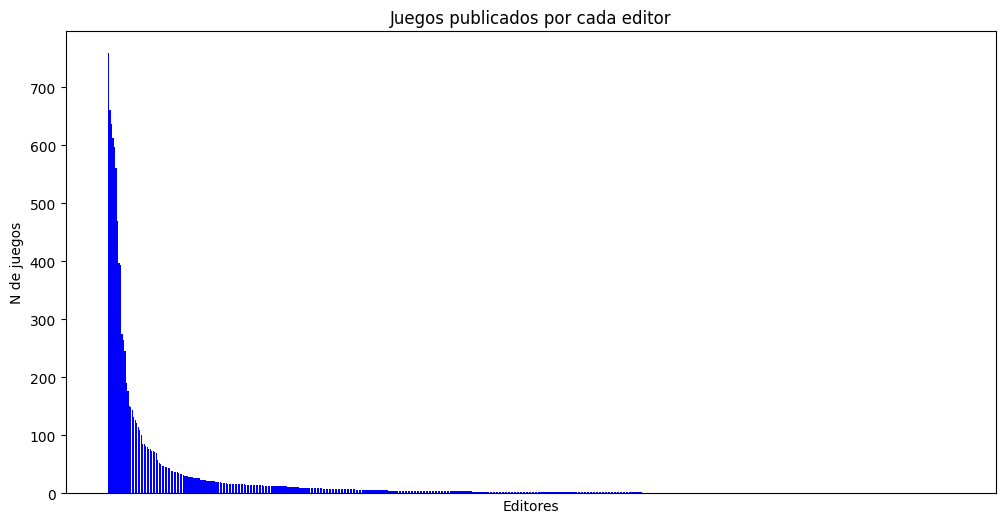

Namco Bandai Games              758
Nintendo                        661
Konami Digital Entertainment    636
Sony Computer Entertainment     612
Electronic Arts                 596
Name: Publisher, dtype: int64


"datata = pd.DataFrame(editores, valores)\nprint(datata.head())\n# Contamos las veces que aparece cada editor\nrecuento = Counter(list(df_sin_duplicados.Publisher))\nnombres = list(recuento.keys())\nvalores = list(recuento.values())\n\n#Esto no lo entendí muy bien pero si no lo hago el gráfico da error\neditores = []\nfor nombre in nombres:\n  if isinstance(nombre, str):\n    editores.append(nombre)\n  else:\n    editores.append(str(nombre))\n\n\n# Creamos el grafico\nplt.figure(figsize=(12, 6))\nplt.bar(editores, valores, color='blue')\nplt.xlabel('Editores')\nplt.ylabel('N de juegos')\nplt.title('Juegos publicados por cada editor')\nplt.xticks([])\nplt.show()\n\ndatata = pd.DataFrame(editores, valores)\nprint(datata.head())"

In [38]:
# Eliminamos los juegos que aparecen más de una vez
df_sin_duplicados = df.drop_duplicates(subset=['Name'])

recuento = df_sin_duplicados['Publisher'].value_counts()
# Creamos el grafico
plt.figure(figsize=(12, 6))
plt.bar(recuento.index , recuento, color='blue')
plt.xlabel('Editores')
plt.ylabel('N de juegos')
plt.title('Juegos publicados por cada editor')
plt.xticks([])
plt.show()

print(recuento.head())

#### Total ventas por región y editor <a name="ventas_editor_region"></a>
El siguiente código mostrará las ventas totales de cada editor en cada una de las regiones que aparecen en la base de datos.

In [ ]:
ventas = df.groupby(['Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas)

#### Ventas ordenadas por plataforma y región <a name="ventas_plat_region"></a>
El siguiente código mostrará las ventas totales que ha tenido cada plataforma en cada una de las regiones de la base de datos.

In [39]:
ventas = df.groupby(['Platform'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas)

          NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
2600         90.60      5.47      0.00         0.91         97.08
3DO           0.00      0.00      0.10         0.00          0.10
3DS          78.87     58.52     97.35        12.63        247.46
DC            5.43      1.69      8.56         0.27         15.97
DS          390.71    194.65    175.57        60.53        822.49
GB          114.32     47.82     85.12         8.20        255.45
GBA         187.54     75.25     47.33         7.73        318.50
GC          133.46     38.71     21.58         5.18        199.36
GEN          19.27      5.52      2.67         0.89         28.36
GG            0.00      0.00      0.04         0.00          0.04
N64         139.02     41.06     34.22         4.38        218.88
NES         125.94     21.15     98.65         5.31        251.07
NG            0.00      0.00      1.44         0.00          1.44
PC        

#### Ventas por género (gráfico) <a name="ventas_gene"></a>
El siguiente código mostrará las ventas totales de cada género de videojuegos en cada una de las regiones de la base de datos y usará la infromación para elaborar un gráfico que la represente.

In [ ]:
ventas_genero = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas_genero)

In [ ]:
ventas_genero.plot(kind='bar', stacked=False, figsize=(12,8))
plt.xlabel('Genre')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()

# Muestra el gráfico
plt.show()

#### Indicar cual es el juego más popular, el género, el editor y la plataforma de todos los tiempos | siglo XX | siglo XXI <a name="popular"></a>
El siguiente código mostrará el juego que más ventas obtuvo durante el siglo XX y durante el siglo XXI.

In [43]:
df_xx = df[df['Year'] < 2000]
df_xxi = df[df['Year'] >= 2000]
juego_popular_xx = df_xx[df_xx['Global_Sales'] == df_xx['Global_Sales'].max()]
juego_popular_xxi = df_xxi[df_xxi['Global_Sales'] == df_xxi['Global_Sales'].max()]
print(juego_popular_xx[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']],
      "\n\n", juego_popular_xxi[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']])

                Name Platform    Year     Genre Publisher  Global_Sales
1  Super Mario Bros.      NES  1985.0  Platform  Nintendo         40.24 

          Name Platform    Year   Genre Publisher  Global_Sales
0  Wii Sports      Wii  2006.0  Sports  Nintendo         82.74


#### Tendencias de ventas de videojuegos a lo largo de los años <a name="tendencias"></a>
El siguiente código representará gráficamente como ha ido evolucionando la venta de videojuegos a lo largo del tiempo.

In [ ]:
import matplotlib.pyplot as plt

ventas_years = df.groupby('Year')[['Global_Sales']].sum()

plt.figure(figsize=(12,6))
plt.plot(ventas_years.index, ventas_years.values, marker='o', linestyle='-', color='b', label='Tendencia')

plt.title('Tendencias de ventas a lo largo de los años')
plt.xlabel('Years')
plt.ylabel('Global_Sales')
plt.grid(True)
plt.show()

#### Gráfico que relacione las ventas globales y la plataforma <a name="ventas_globales"></a>
El siguiente código representará gráficamente las ventas totales que ha tenido cada plataforma estratificada en función de cada género en cada plataforma.

In [ ]:
ventas_plataforma = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().unstack()

# Plot the stacked bar graph
ventas_plataforma.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add labels and title
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.title('Ventas globales en función del género y la plataforma')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation of x-axis labels for better readability
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')  # Show the legend


#### Los 10 años con más ventas en Japón <a name="japon"></a>
El siguiente código representará gráficamente los 10 años con mayores ventas de juegos en Japón con sus correspondientes ventas totales.

In [ ]:
ventas_por_año = df.groupby('Year')['JP_Sales'].sum()
top_ventas = ventas_por_año.sort_values(ascending = False).head(10)
print(top_ventas)

In [ ]:
plt.bar(top_ventas.index.astype(str), top_ventas)
plt.xlabel('Anio')
plt.ylabel('Ventas en Japón')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()

# Muestra el gráfico
plt.show()

#### Tipo de juego más vendido en cada región <a name="tipo_juego"></a>
El siguiente código mostrará el género de videojuegos más vendido en cada región de la base de datos, informando además de las ventas regionales de ese género.

In [51]:
genero_eu = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending = False)
print(f'El tipo de juego más vendido en EU son los de {genero_eu.index[0]} con {genero_eu[0]} ventas')

genero_jp = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending = False)
print(f'El tipo de juego más vendido en Japón son los de {genero_jp.index[0]} con {genero_jp[0]} ventas')

genero_na = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending = False)
print(f'El tipo de juego más vendido en Norteamércia son los de {genero_na.index[0]} con {genero_na[0]} ventas')

genero_otros = df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending = False)
print(f'El tipo de juego más vendido en el resto de regiones son los de {genero_otros.index[0]} con {genero_otros[0]} ventas')

El tipo de juego más vendido en EU son los de Action con 525.0 ventas
El tipo de juego más vendido en Japón son los de Role-Playing con 352.31 ventas
El tipo de juego más vendido en Norteamércia son los de Action con 877.83 ventas
El tipo de juego más vendido en el resto de regiones son los de Action con 187.38 ventas


#### Listado del editor que más juegos ha lanzado en cada año <a name="top_editor"></a>
El siguiente código mostrará, por cada año, el editor que más juegos puso a la venta ese mismo año.

In [52]:
top_editores_year = df_sin_duplicados.groupby('Year')['Publisher'].apply(lambda x: x.mode().iloc[0])

print(top_editores_year)


Year
1980.0                      Activision
1981.0                           Atari
1982.0                           Atari
1983.0                           Atari
1984.0                        Nintendo
1985.0                        Nintendo
1986.0                        Nintendo
1987.0                           Atari
1988.0                        Nintendo
1989.0                        Nintendo
1990.0                        Nintendo
1991.0                        Nintendo
1992.0                        Nintendo
1993.0                        Nintendo
1994.0                            Sega
1995.0     Sony Computer Entertainment
1996.0     Sony Computer Entertainment
1997.0     Sony Computer Entertainment
1998.0     Sony Computer Entertainment
1999.0    Konami Digital Entertainment
2000.0    Konami Digital Entertainment
2001.0    Konami Digital Entertainment
2002.0                           Atari
2003.0                             THQ
2004.0                        Nintendo
2005.0              

## Análisis de datos exploratorio <a name="Analisis_de_datos_exploratorio"></a>

### ¿Existe alguna correlación en el siglo XX para los juegos más vendidos por región? <a name="corr"></a>
El siguiente código mostrará la matriz de correlaciones de las variables de la base de datos.

In [ ]:
dfXX = df[df.Year < 2001]
corr_matrix_XX = dfXX.corr(numeric_only=True)
print(f"La matriz de correlaciones de los datos es:\n{corr_matrix_XX}")

En el caso de los juegos publicados en el siglo XX, los datos no muestran correlaciones altas entre ventas globales y el año de publicación, lo que parece indicar que en ese periodo no importaba en qué año saliese un juego ya que no influye en sus ventas. El rango (determinado por las ventas globales) y las ventas por región (que se utilizan para construir la variable ventas globales) presentan correlaciones de medias a altas por motivos evidentes. \\
Las variables nominales no pueden ser correlacionadas debido a que carecen de valor numérico y, por tanto, de métrica. \\
La región de Japón y la variable "Otras regiones" correlacionan de manera notablemente menor, por lo que las ventas japonesas serían el peor predictor de las ventas en otras regiones y podría ser objeto de futuros análisis.

#### ¿Y para el siglo XXI?

In [ ]:
dfXXI = df[df.Year > 2000]
corr_matrix_XXI = dfXXI.corr(numeric_only=True)
print(f"La matriz de correlaciones de los datos es:\n{corr_matrix_XXI}")

Los resultados son similares a los del siglo pasado. La mayor diferencia apreciable a simple vista es la bajada en la relación entre ventas globales y ventas en la región nipona. La correlación de Pearson entre ambas variables es menor en el siglo XXI que en el XX y podría indicar que los juegos que triunfan en Japón no siempre lo hacen en el esto del mundo. Además, la relación entre el año de publicación y las ventas globales es tan baja que los datos no muestran ningún tipo de relación

#### ¿Es la misma tendencia si tomamos los datos de todos los años?

In [ ]:
corr_matrix = df.corr(numeric_only=True)
print(f"La matriz de correlaciones de los datos es:\n{corr_matrix}")

### ¿Hay información incorrecta o nula? <a name="NA"></a>
El siguiente código representará gráficamente los valores perdidos que pueda haber en la base de datos.

In [ ]:
import missingno as msno

# Matriz de visualización de los valores perdidos
msno.matrix(df)
#plt.show()

perdidos = df.isnull().sum()
print(f'En total, la base de datos cuenta con {sum(perdidos)} valores perdidos.\n{perdidos["Year"]} valores perdidos corresponden a la variable YEAR y {perdidos["Publisher"]} a la variable editores')

#### Si es así, ¿desvirtúa el resultado?
Es muy complicado saber si los datos perdidos están afectando a los resultados de los análisis debido a que a priori no concocemos la causa de que el valor se haya perdido. Podría ser azar, lo que no afecta a los resultados; pero también podría deberse a factores relacionados con otras variables (o incluso consigo misma), lo que sesgaría cualquier análisis en el que no se tratasen adecuadamente. \\
Las técnicas usadas a continuación NO DEMUESTRAN POR SI SOLAS un patrón concreto de pérdida de datos, sino que debe ser complementada con estudios enfocados a resolver este problema. Aún así nos permiten orientar esos estudios.

In [ ]:
def test_chi(a, b):
  contingency_table = pd.crosstab(df[a], df[b])
  chi2, p, _, _ = chi2_contingency(contingency_table)
  alpha = 0.05
  if p < alpha:
    print(f"\nLa asociación entre {a} y {b} es estadísticamente significativa.\nChi2: {chi2} con p: {p}")
  else:
    print(f"\nLa asociación entre {a} y {b} no es estadísticamente significativa.\nChi2: {chi2} con p: {p}")

# La corremos con todas las variables categóricas
test_chi('Year', 'Name')
test_chi('Year', 'Genre')
test_chi('Year', 'Publisher')
test_chi('Year', 'Platform')
test_chi('Publisher', 'Name')
test_chi('Publisher', 'Genre')
test_chi('Publisher', 'Platform')


Como puede verse, la prueba de independencia (sumada a las correlaciones encontradas en el apartado anterior) arroja valores que invitan a pensar que las variables categóricas puedan estar relacionadas y, por tanto, que el efecto de los valores perdidos pueda sesgar las conclusiones de los análisis si no se tienen en cuenta. \\
Sin embargo, es importante recalcar la imprecisión de este estudio y las inconsistencias de algunos estadísticos como chi cuadrado cuando el tamaño muestral es elevado.

### ¿Cuáles son los 5 años en los cuales aparecieron más juegos? <a name="cinco_anos"></a>
El siguiente código mostrará gráficamente los 5 años en los que más  juegos fueron lanzados al mercado.

In [ ]:
year_top_juegos = df['Year'].value_counts().nlargest(5).reset_index(name='count')
print(year_top_juegos)

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(year_top_juegos['Year'], year_top_juegos['count'], color='skyblue')
plt.title('Años con más juegos')
plt.xlabel('Año')
plt.ylabel('Cantidad juegos')
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para que no se superpongan las etiquetas
plt.tight_layout()

# Mostrar el gráfico de barras agrupadas
plt.show()

#### ¿Se puede encontrar una explicación?
Si, esos años coinciden con el lanzamiento de varias consolas de videojuegos, por lo que es normal que las empresas saquen más juegos esos años para asi obtener mejores ventas.

#### ¿Y si desglosamos esos 5 años por género?
El siguiente código usará la información del anterior para desglosar las ventas de cada uno de los cinco años por los géneros correspondoentes

In [ ]:
year_top_juegos = df['Year'].value_counts().nlargest(5).index
df_top_years = df[df['Year'].isin(year_top_juegos)]
genre_by_year = df_top_years.groupby(['Year', 'Genre']).size()
print(genre_by_year)

In [ ]:
genre_by_year = df_top_years.groupby(['Year', 'Genre']).size().reset_index(name='Counts')

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Counts', hue='Genre', data=genre_by_year, palette='viridis', dodge=True)
plt.title('Frecuencia de Géneros para los 5 años con más juegos')
plt.xlabel('Año')
plt.ylabel('Cantidad juegos')
plt.legend(title='Género', bbox_to_anchor=(1, 1))
plt.grid(True)

# Ajustar el diseño para que no se superpongan las etiquetas
plt.tight_layout()

# Mostrar el gráfico de barras agrupadas
plt.show()

### ¿Qué genero ha sido el más versionado en algún momento? <a name="genero_versionado"></a>
El siguiente código mostrará, para cada género, cuál fue el año en que más juegos de ese género se lanzaron a la venta.

In [ ]:
df_filtered = df[df['Year'].notnull()]
genero_mas_versionado = df_filtered.groupby(['Year', 'Genre']).size().reset_index(name='counts')
idx = genero_mas_versionado.groupby('Genre')['counts'].idxmax()
result = genero_mas_versionado.loc[idx, ['Genre', 'Year', 'counts']]
print(result)

In [ ]:
# Crear un gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='counts', hue='Genre', data=result, palette='viridis', dodge=True)
plt.title('Género más versionado para cada año')
plt.xlabel('Año')
plt.ylabel('Número de versiones')
plt.legend(title='Género', bbox_to_anchor=(1, 1))
plt.grid(True)

# Rotar etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para que no se superpongan las etiquetas
plt.tight_layout()

# Mostrar el gráfico de barras agrupadas
plt.show()

#### ¿Tiene sentido?
En general si, ya que se puede ver como a medida que pasan los años los juegos que son más complejos, como los de acción o simulación van creciendo mientras que los juegos más sencillos como los de carreras o plataformeo tuvieron su auge en el pasado. \\
Sobre todo se puede encontrar un sentido en la moda del momento, pero con estos datos no podemos concluir si es la moda de un género la que propicia su despuntamiento o es la potencia de las herramientas de programación la que dirige los juegos que salen a la venta.

### ¿Se corresponde de alguna manera los editores que más venden con los que más juegos lanzan? <a name="corr2"></a>
El siguiente código calcula las ventas relativas de cada editor en función del número de juegos publicados y mostrará la matriz de correlaciones de las variables ventas globales, frecuencia de juegos publicados por una misma editorial y ventas relativas.

In [ ]:
ventas_editor = df.groupby('Publisher')['Global_Sales'].sum()

df_sin_duplicados = df.drop_duplicates(subset=['Name'])
juegos_editor = df_sin_duplicados['Publisher'].value_counts().reset_index(name = 'Frecuencia')

merged_df = pd.merge(juegos_editor, ventas_editor, left_on='index', right_index=True)
merged_df['Ventas_relativas'] = merged_df['Global_Sales'] / merged_df['Frecuencia']
matriz = merged_df.corr(numeric_only=True)
print(merged_df)
print(matriz)




#### ¿Existe alguna correlación?
Si solo se tienen en cuenta las ventas globales respecto al número de juegos publicados, parece haber una fuerte correlación entre juegos publicados y ventas. Esto tiene sentido, pues cuantos más servicios pone en venta una compañía, más probable es que alguien compre alguno de esos productos, aparte de que publicar muchos juegos implica un mayor gasto que solo pueden asumir los editores que venden suficiente. \\
Sin embargo, si se estudia la correlación entre los juegos publicados y las ventas relativas (la media de ventas por cada juego que publica una única editorial) se puede apreciar como esta correlación desaparece. \\
Por tanto, se puede concluir que sacar juegos si correlaciona con vender juegos, pero no con que cada juego individual se venda.